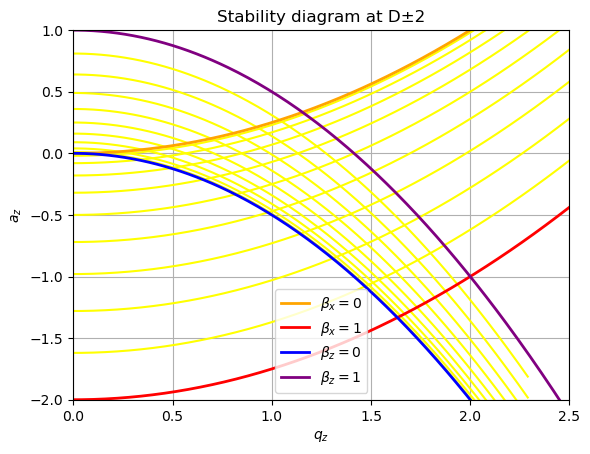

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#D±2までの近似（β_z^2 = a_z + q_z^2 / 2と近似）

for beta in range(1, 10):#β_x
 
 beta_x = beta/10

 
 q_x = np.arange(-2.5, 1.0, 0.01)#q_xの範囲

 a_x = beta_x**2 - q_x**2 / 2#q_xのa_xの関係式

 q_z = -2 * q_x#q_xとq_zの関係式
 a_z = -2 * a_x#a_xとa_zの関係式

 plt.plot(q_z, a_z, color = 'yellow')

for beta_z in range(1, 10):#β_z
 beta_z1 = beta_z / 10

 q_z = np.arange(-2.5, 2.3, 0.01)#q_zの範囲

 a_z = beta_z1**2 - q_z**2 / 2#q_zとa_zの関係式

 plt.plot(q_z, a_z, color = 'yellow')

#--β_xの下限--
beta_x = 0

q_x = np.arange(-2.5, 1.0, 0.01)#q_xの範囲

a_x = beta_x**2 - q_x**2 / 2#q_xのa_xの関係式

q_z = -2 * q_x#q_xとq_zの関係式
a_z = -2 * a_x#a_xとa_zの関係式

plt.plot(q_z, a_z, color = 'orange', label = r'$\beta_x = 0$', linewidth = 2)


#--β_xの上限--  
beta_x = 1

q_x = np.arange(-2.5, 1.0, 0.01)#q_xの範囲

a_x = beta_x**2 - q_x**2 / 2#q_xのa_xの関係式

q_z = -2 * q_x#q_xとq_zの関係式
a_z = -2 * a_x#a_xとa_zの関係式

plt.plot(q_z, a_z, color = 'red', label = r'$\beta_x = 1$', linewidth = 2)


#--β_zの下限--
beta_z = 0

q_z = np.arange(-2.5, 2.5, 0.01)#q_xの範囲

a_z = beta_z**2 - q_z**2 / 2#q_xのa_xの関係式

plt.plot(q_z, a_z, color = 'blue', label = r'$\beta_z = 0$', linewidth = 2)


#--β_zの上限--
beta_z = 1

q_z = np.arange(-2.5, 2.5, 0.01)#q_xの範囲

a_z = beta_z**2 - q_z**2 / 2#q_xのa_xの関係式

plt.plot(q_z, a_z, color = 'purple', label = r'$\beta_z = 1$', linewidth = 2)


plt.xlim(0, 2.5)
plt.ylim(-2, 1)
plt.title('Stability diagram at D±2')
plt.grid(True)
plt.xlabel(r'$q_z$')
plt.ylabel(r'$a_z$')  
plt.legend()
plt.show()

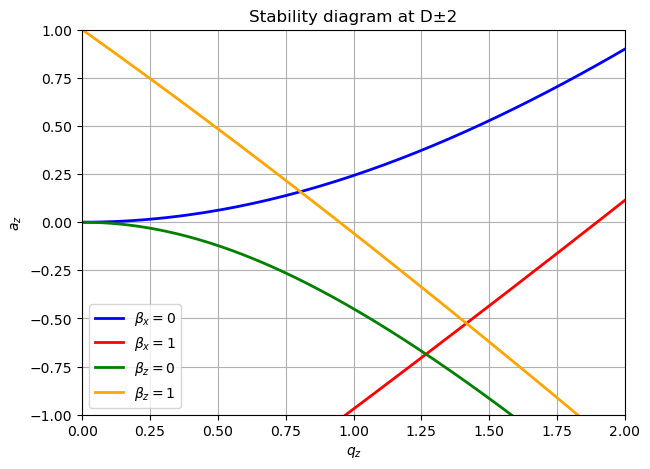

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#D±2の近似（数値計算）

#--動径方向の安定領域--

#--β_xの下限--

beta_x = 0
q = np.linspace(-2.0, 2.0, 400)#q_xの範囲を定義
a_xlist = []
a_zlist = []
q_zlist = []

def f(a_x, q_x, beta_x):#関数を定義
    
     S_1 = a_x - (2 + beta_x)**2#D_2の分母
     S_2 = a_x - (-2 + beta_x)**2#D_2の分母
     S = 1 / S_1 + 1 / S_2#連分数
     return  beta_x**2 - a_x + q_x**2 * S#方程式

a_guess = 0.0#初期値

for q_x in q:#q_xを動かす

 ax_vals = fsolve(f, a_guess, args= (q_x, beta_x))#解を求める

 a_x = ax_vals[0]

 a_xlist.append(a_x)
 a_zlist.append(-2 * a_x)
 q_zlist.append(-2 * q_x)

 a_guess = a_x


#--β_xの上限--

beta_x = 1
a_xlist1 = []
a_zlist1 = []
q_zlist1 = []

a_guess = 0.0#初期値

for q_x in q:#q_xを動かす

 ax_vals1 = fsolve(f, a_guess, args= (q_x, beta_x))#解を求める

 a_x1 = ax_vals1[0]

 a_xlist1.append(a_x1)
 a_zlist1.append(-2 * a_x1)
 q_zlist1.append(-2 * q_x)

 a_guess = a_x1


#--β_zの下限--

beta_z = 0
a_zlist0 = []
q_zlist0 = []

def f(a_z, q_z, beta_z):#関数を定義
    
     S_1 = a_z - (2 + beta_z)**2#D_2の分母
     S_2 = a_z - (-2 + beta_z)**2#D_2の分母
     S = 1 / S_1 + 1 / S_2#連分数
     return  beta_z**2 - a_z + q_z**2 * S#方程式

a_guess = 0.0#初期値

for q_z in q:#q_zを動かす

 az_vals = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

 a_z = az_vals[0]

 a_zlist0.append(a_z)
 q_zlist0.append(q_z)

 a_guess = a_z


#--β_zの上限--

beta_z = 1
a_zlist01 = []
q_zlist01 = []

a_guess = 0.0#初期値

for q_z in q:#q_zを動かす

 az_vals1 = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

 a_z1 = az_vals1[0]

 a_zlist01.append(a_z1)
 q_zlist01.append(q_z)

 a_guess = a_z1


#--グラフを描画する--
plt.figure(figsize=(7,5))
plt.plot(q_zlist, a_zlist, color='blue', label=r'$\beta_x = 0$', linewidth = 2)
plt.plot(q_zlist1, a_zlist1, color='red', label=r'$\beta_x = 1$', linewidth = 2)
plt.plot(q_zlist0, a_zlist0, color='green', label=r'$\beta_z = 0$', linewidth = 2)
plt.plot(q_zlist01, a_zlist01, color='orange', label=r'$\beta_z = 1$', linewidth = 2)
plt.xlabel(r'$q_z$')
plt.ylabel(r'$a_z$')
plt.title('Stability diagram at D±2')
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(-1, 1)
plt.legend()
plt.show()

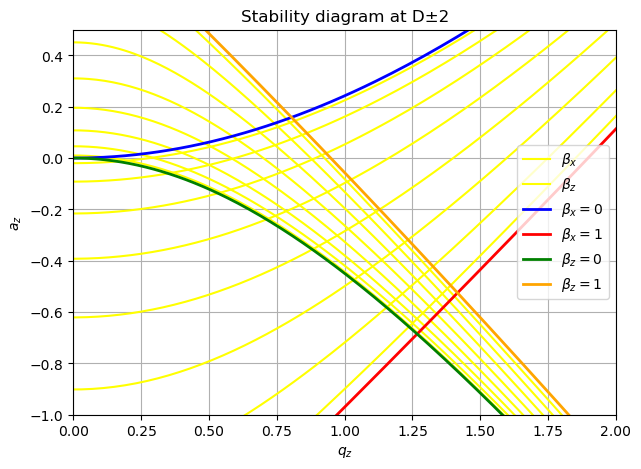

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#D±2の近似（数値計算）

#--動径方向の安定領域--


beta = np.linspace(0.1, 0.9, 8)#β_xの範囲を定義
q = np.linspace(-2.0, 2.0, 400)#q_xの範囲を定義
a_xlist10 = []
a_zlist10 = []
q_zlist10 = []

def f(a_x, q_x, beta_x):#関数を定義
    
     S_1 = a_x - (2 + beta_x)**2#D_2の分母
     S_2 = a_x - (-2 + beta_x)**2#D_2の分母
     S = 1 / S_1 + 1 / S_2#連分数
     return  beta_x**2 - a_x + q_x**2 * S#方程式

a_guess = 0.0#初期値

for beta_x in beta:#β_xを動かす

 for q_x in q:#q_xを動かす

  ax_vals = fsolve(f, a_guess, args= (q_x, beta_x))#解を求める

  a_x10 = ax_vals[0]

  a_xlist10.append(a_x10)
  a_zlist10.append(-2 * a_x10)
  q_zlist10.append(-2 * q_x)

  a_guess = a_x10



#--z軸方向--

a_zlist11 = []
q_zlist11 = []

def f(a_z, q_z, beta_z):#関数を定義
    
     S_1 = a_z - (2 + beta_z)**2#D_2の分母
     S_2 = a_z - (-2 + beta_z)**2#D_2の分母
     S = 1 / S_1 + 1 / S_2#連分数
     return  beta_z**2 - a_z + q_z**2 * S#方程式

a_guess = 0.0#初期値

for beta_z in beta:#β_zを動かす
 for q_z in q:#q_zを動かす

  az_vals = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

  a_z11 = az_vals[0]

  a_zlist11.append(a_z11)
  q_zlist11.append(q_z)

  a_guess = a_z11


#β_xの下限
beta_x = 0.0
a_zlist = []
q_zlist = []

a_guess = 0.0#初期値

for q_x in q:#q_xを動かす

 ax_vals = fsolve(f, a_guess, args= (q_x, beta_x))#解を求める

 a_x = ax_vals[0]

 a_xlist.append(a_x)
 a_zlist.append(-2 * a_x)
 q_zlist.append(-2 * q_x)

 a_guess = a_x


#β_xの上限
beta_x = 1.0
a_xlist1 = []
a_zlist1 = []
q_zlist1 = []


a_guess1 = 0.0#初期化

for q_x1 in q:#q_xを動かす

 ax_vals1 = fsolve(f, a_guess1, args= (q_x1, beta_x))#解を求める

 a_x1 = ax_vals1[0]

 a_xlist1.append(a_x1)
 a_zlist1.append(-2 * a_x1)
 q_zlist1.append(-2 * q_x1)

 a_guess1 = a_x1


#z軸方向の安定領域

#β_zの下限
beta_z = 0.0
a_zlist0 = []
q_zlist0 = []

a_guess = 0.0#初期値

for q_z in q:#q_xを動かす

 az_vals = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

 a_z = az_vals[0]

 a_zlist0.append(a_z)
 q_zlist0.append(q_z)

 a_guess = a_z

#β_zの上限
beta_z = 1.0

a_zlist01 = []
q_zlist01 = []

a_guess = 0.0#初期値

for q_z in q:#q_xを動かす

 az_vals = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

 a_z = az_vals[0]

 a_zlist01.append(a_z)
 q_zlist01.append(q_z)

 a_guess = a_z



#--グラフを描画する--
plt.figure(figsize=(7,5))
plt.plot(q_zlist10, a_zlist10, color='yellow', label=r'$\beta_x$')
plt.plot(q_zlist11, a_zlist11, color='yellow', label=r'$\beta_z$')
plt.plot(q_zlist, a_zlist, color='blue', label=r'$\beta_x = 0$', linewidth = 2)
plt.plot(q_zlist1, a_zlist1, color='red', label=r'$\beta_x = 1$', linewidth = 2)
plt.plot(q_zlist0, a_zlist0, color='green', label=r'$\beta_z = 0$', linewidth = 2)
plt.plot(q_zlist01, a_zlist01, color='orange', label=r'$\beta_z = 1$', linewidth = 2)
plt.xlabel(r'$q_z$')
plt.ylabel(r'$a_z$')
plt.title('Stability diagram at D±2')
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(-1, 0.5)
plt.legend()
plt.show()